**1. Функции одного аргумента и их точки минимума**

Начнём с точки минимума параболы. Вот вам функция f(x)=3x^2-12x+4. 
Найдите у нее точку минимума (имеется в виду значение переменной х, при котором функция принимает минимальное значение). Функция эта чертовски проста, у нее ровно один минимум (как раз тот случай, когда локальный минимум совпадает с глобальным). 

In [ ]:
import sympy as sp

# Подключаем модуль научных вычислений
x = sp.Symbol('x', real=True)

# Формула функции
f = 3 * x * x - 12 * x + 4

# Берём производную функции
fprime = f.diff(x)

# Ищем все точки, в которых производная равна 0
all_solutions = [(xx, f.subs(x, xx)) for xx in sp.solve(fprime, x)]

# Нужны Х-координаты
print('Координаты всех точек max-min:', *all_solutions)

Координаты всех точек max-min: (2, -8)


Вот вам функция посложнее: f(x)=x(x^2-9).
Где у нее точка минимума? Напишите значение аргумента х, при котором у функции наблюдается локальный минимум. А ещё лучше постройте ее график – пригодится на следующем этапе.

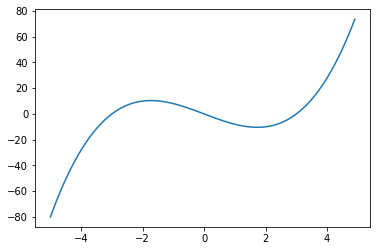

Значение в минимуме: 1.73


In [ ]:
# Импортируем нужные модули
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt

# Символьное решение по переменной x
x = sp.Symbol('x', real=True)

# Указываем вид нужной функции
f = x * (x ** 2 - 9)

# Находим производную по нашей функции
fprime = f.diff(x)

# Генерируем точки для постройки графика
xx = np.arange(-5, 5, 0.1)
yy = xx * (xx ** 2 - 9)

# Находим все точки локальных экстремумов
all_solutions = [(xx, f.subs(x, xx)) for xx in sp.solve(fprime, x)]

# Строим график функции
plt.figure()
plt.plot(xx, yy)
plt.show()

# Сортируем все решения и выводим первое (минимум) с нужной точностью
print('Значение в минимуме:', round(
    float(sorted(all_solutions, key=lambda x: x[1])[0][0]), 2))

Вы теперь думаете, что шарик по графику функции f(x)=x^4 всегда катится быстрее, чем по графику функции f(x)=x^2? А вот и нет! Можете найти все такие начальные позиции a_0
​
 , что градиентный спуск по функции f(x)=x^2 приведет к не меньшему перемещению шарика, чем по функции f(x)=x^4?

В ответе напишите максимально возможное значение для такой начальной позиции  a_0.

In [ ]:
import sympy as sp
from sympy import reduce_inequalities

a = sp.Symbol('a', real=True)

f1 = x ** 4
f2 = x ** 2

f1_derivative = f1.diff(x)
f2_derivative = f2.diff(x)

h = 0.1

reduce_inequalities(a - f1_derivative.subs(x, a) * 0.1 <= a - f2_derivative.subs(x, a) * 0.1, [a])

(0.707106781186548 <= a) | ((-0.707106781186548 <= a) & (a <= 0))

У нас функция f(x)=x^4, и начальная позиция равна a_0=1. Чему должен быть равен шаг обучения h, чтобы на следующей итерации градиентного спуска мы оказались бы в точке a_1=-1?? (и напишите это значение h в ответ)

P.S. На досуге подумайте еще вот о чём: а если в этой задаче взять функцию f(x)=x^6, то ответ будет больше (меньше) и почему?

P.S.S. Кто догадается, куда из точки a_1=-1 при найденном значении шага обучения h попадёт шарик на втором шаге? Иными словами, чему равно  a_2? Весело?

In [ ]:
import sympy as sp

h = sp.Symbol('h', real=True)

f = x ** 4
f_derivative = f.diff(x)

a = 1
h = sp.solve(a - f_derivative.subs(x, a) * h + 1, h)[0]
print('h =', float(h))

for i in '12':
    a = a - f_derivative.subs(x, a) * h
    print(f'a{i} = {a}')

h = 0.5
a1 = -1
a2 = 1


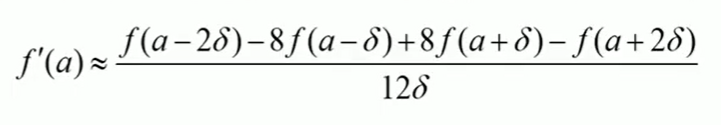

In [ ]:
f = lambda x: 2 ** x
g = lambda a, δ=1: (f(a - 2 * δ) - 8 * f(a - δ) + 8 * f(a + δ) - f(a + 2 * δ)) / (12 * δ)
print(g(0))

0.6875


**2. Точки минимума функций многих переменных**

Построение 3D графика

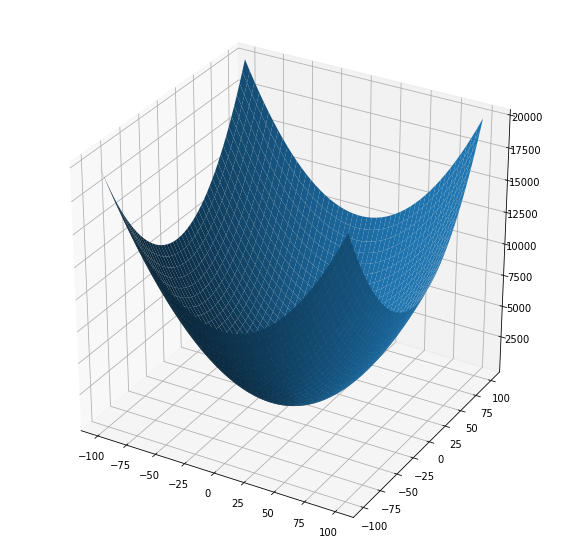

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-100, 100, 50)
y = np.linspace(-100, 100, 50)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z)
plt.show()

Дана ФМП: f(x_1,x_2)=x_1^2+4x_1+x_2^2-2x_2+10. Найдите ее частные производные (их 2 штуки). Приравняйте обе производные к нулю и решите полученную систему уравнений. Ее решение и будет точкой минимума. 

В ответ напишите значение переменной x_1 в точке минимума.

In [ ]:
from sympy import symbols, solve, diff

# Объявляем переменные
x1, x2 = symbols('x1 x2')

# Вид функции
Exp = x1**2 + 4*x1 + 2*x2**2 + 5*x2 + 3*x1*x2 + 6

# Производная по x1
dx1 = diff(Exp, x1)
# Вид производной по x1
print(dx1)

# Производная по x2
dx2 = diff(Exp, x2)
# Вид производной по x2
print(dx2)

# Решим систему уравнений (производные равны 0)
ans = solve([dx1, dx2], [x1, x2])
# Ответы
print(f'x1 = {ans[x1]}\nx2 = {ans[x2]}')

2*x1 + 3*x2 + 4
3*x1 + 4*x2 + 5
x1 = 1
x2 = -2


А это задачка просто на навыки дифференцирования. Дана функция f(x_1,x_2)=sin (x_1 * x_2), слабо найти ее частные производные?

Напишите в ответ, чему равно значение частной производной по второму аргументу в точке  (1, 0).

In [ ]:
from sympy import symbols, solve, diff, sin

x1, x2 = symbols('x1 x2')

f = sin(x1 * x2)
dx2 = diff(f, x2)

ans = dx2.subs({x1: 1, x2: 0})
print(ans)

1


Вот вам функция от двух аргументов f(x_1,x_2)=x_1^2+10x_2^2. На видео-лекции была аналогичная функция, только без коэффициента 10. Постройте ее график, там будет видно, какая у этой функции точка минимума. Поверхность будет похожа на сплюснутый стаканчик. Пусть первая точка градиентного спуска равна a_0=(10,1),  шаг h=0.1. Чему равна первая координата следующей позиции "шарика" a_1=(?,...)? Впишите это значение в ответ.

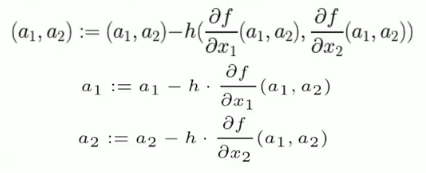

In [ ]:
from sympy import symbols, diff

f = x1 ** 2 + 10 * x2 ** 2
x1, x2 = symbols('x1 x2')

dx1 = diff(f, x1)
dx2 = diff(f, x2)

a = [10, 1]
h = 0.1

for j in '123':
    a = [a[0] - dx1.subs(x1, a[0]) * h, a[1] - dx2.subs(x2, a[1]) * h]
    print(f'a{j} = {a}')

a1 = [8.00000000000000, -1.00000000000000]
a2 = [6.40000000000000, 1.00000000000000]
a3 = [5.12000000000000, -1.00000000000000]


Пусть f(x)=x^2, a_0=1, h=1, тогда следующей точкой спуска будет a_1=-1, а потом будет a_2=1 - то есть градиентный спуск вернётся к первоначальной позиции (проверьте это сами!). Иными словами, градиентный спуск «зациклится" и на следующих шагах мы уже никогда не приблизимся к точке минимума x=0. Мы будем лишь колебаться между точками -1 и 1.

Что делать?

А нужно применить одну из модификаций градиентного спуска, связанной с изменением шага h. Итак, возьмем формулу h=h_0(1-n/T) для h_0=1, T=4.

Это означает, что возникнет следующая последовательность шагов: 1, 0.75, 0.5, 0.25, 0.

Кроме того, после пятого шага спуска шаг станет равным 0 и процесс самопроизвольно остановится. В общем, у вас есть 5 шагов, чтобы подойти к точке минимума.

Давайте вычислять позиции "шарика" после каждого шага. Поскольку вначале шаг равен 1, то (как и ранее) мы получим a_1=-1. А вот дальше начинаются различия.

Найдите позиции шарика a_2, не забывайте, что в первом случае вы должны использовать шаг h=0.75, а во втором случае h=0.5.

В ответ запишите точку a_3.

In [4]:
from sympy import symbols, diff

x = symbols('x', real=True)

f = x ** 2
dx = diff(f, x)

a = -1
h = 1
T = 4

for n in range(3):
    a = a - dx.subs(x, a) * h * (1 - n / T)
    print(f'a{n + 1} = {a}')

a1 = 1.00000000000000
a2 = -0.500000000000000
a3 = 0


Возьмём функцию из прошлой задачи  f(x)=x^2, a_0=1, h=1 (ибо придумывать новую — лень). Ранее мы выяснили, что "классический" градиентный спуск будет лишь колебаться между точками -1 и 1.

Что делать?

А нужно применить одну из модификаций градиентного спуска, связанной с изменением шага h. На этот раз возьмем другую формулу: h=h_0 * e^{-n/T} для h_0=1, T=1. Это означает, что возникнет такая последовательность уменьшающихся шагов h: 1,   0.37,  0.14 ... 

 

Давайте вычислять позиции «шарика» после каждого шага. Поскольку вначале шаг равен 1, то (как и ранее) мы получим a_1=-1. А вот дальше начинаются различия.

Найдите позиции шарика a_2, a_3, не забывайте, что в первом случае вы должны использовать шаг h=0.37, а во втором случае h=0.14

В ответ запишите точку a_3.

In [12]:
from sympy import symbols, diff, E

x = symbols('x', real=True)

f = x ** 2
dx = diff(f, x)

a = 1
h = 1
T = 1

for n in range(3):
    a -= dx.subs(x, a) * h * E ** (-n / T)
    print(f'a{n + 1} = {a}')

a1 = -1
a2 = -0.264241117657115
a3 = -0.192718824655346
